In [22]:
import sympy
from sympy import symbols, diff
import numpy as np
from scipy.linalg import solve
from sympy.solvers.solveset import linsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from scipy import optimize
from scipy.optimize import minimize
import time

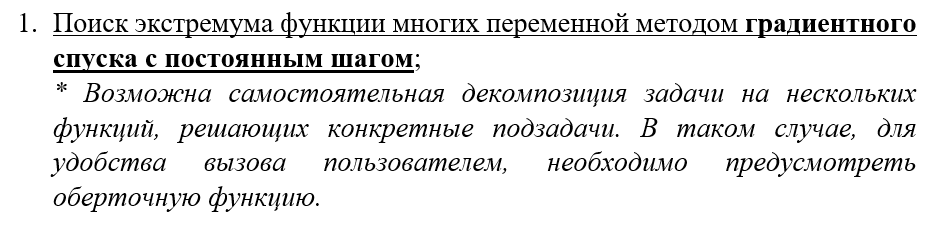

In [23]:
variable = input('Введите названия переменных: ').split()
starting_point = [int(x) for x in input('Введите значение начальной точки через пробел, целые числа: ').split()]
func = input('Введите минимизируемую функцию: ')
func_g = input('Функция градиента в аналитическом виде: ')
const = float(input('Введите константу шага (λ): '))
par = int(input('Указать необязательные параметры? 1-да/0-нет: '))


if par:
    accuracy = float(input('Точность оптимизации по аргументу для критерия Останова: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    accuracy = 0.00001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0


args = sympy.symbols(variable)
func = sympy.sympify(func)
func_g = sympy.sympify(func_g)

Введите названия переменных: x y z
Введите значение начальной точки через пробел, целые числа: 15 14 12
Введите минимизируемую функцию: x**2 + y**2 + z**2
Функция градиента в аналитическом виде: 2*x + 2*y + 2*z
Введите константу шага (λ): 0.5
Указать необязательные параметры? 1-да/0-нет: 0


In [24]:
def obj_func(func, starting_point):
    func_new = func
    for i in range(len(args)):
        func_new = func_new.subs(args[i], starting_point[i])
    return func_new

def grad_func(func_g, starting_point):
    func_new_g = func_g
    for i in range(len(args)):
        func_new_g = func_new_g.subs(args[i], starting_point[i])
    return func_new_g

In [25]:
def gradient_descent(max_iterations,threshold,w_init,func,func_g,extra_param = [],learning_rate=0.05,momentum=0.8):
    
    w = np.array(w_init)
    w_history = w
    f_history = obj_func(func,w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(func_g,w) + momentum*delta_w
        w = w+delta_w
        
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(func,w)))
        res_p = w
        res_f = obj_func(func,w)

        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    if inter_res:
        return res_p, res_f, w_history, f_history
        
    return res_p, res_f

In [26]:
s = time.time()

print(f'Значения переменных: {gradient_descent(iteration, accuracy, starting_point, func, func_g, learning_rate = const)[0]}')
print(f'Значения функции: {gradient_descent(iteration, accuracy, starting_point, func, func_g, learning_rate = const)[1]}')
if inter_res:
    print(f'История: {gradient_descent(iteration, accuracy, starting_point, func, func_g, learning_rate = const)[4]}')
e = time.time()
print(e-s)

Значения переменных: [1.33549043797362 0.335490437973619 -1.66450956202638]
Значения функции: 4.66668062596796
0.9870498180389404


In [121]:
#дополнительно

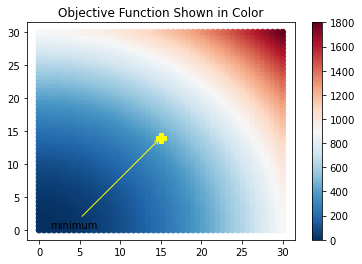

In [122]:
def visualize_fw():
    xcoord = np.linspace(0.0,30.0,50)
    ycoord = np.linspace(0.0,30.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    pts = pts.transpose()
    
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))


def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    annotate_pt('minimum',tuple(starting_point[:2]),tuple(gradient_descent(iteration, accuracy, starting_point, func, func_g, learning_rate = const)[0][:2]),'yellow')    

pts,f_vals = visualize_fw()

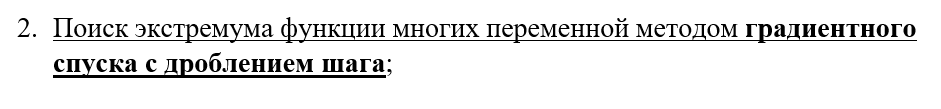

In [124]:
variable = input('Введите названия переменных: ').split()
starting_point = [int(x) for x in input('Введите значение начальной точки через пробел, целые числа: ').split()]
func = input('Введите минимизируемую функцию: ')
func_g = input('Функция градиента в аналитическом виде: ')
const = float(input('Начальный шаг (λ0): '))
est = float(input('Параметр оценки (ε): '))
drob = float(input('Параметр дроблемния (δ): '))

par = int(input('Указать необязательные параметры? 1-да/0-нет: '))
if par:
    accuracy = float(input('Точность оптимизации по аргументу для критерия Останова: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    accuracy = 0.00001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0


args = sympy.symbols(variable)
func = sympy.sympify(func)
func_g = sympy.sympify(func_g)

Введите названия переменных: x y z
Введите значение начальной точки через пробел, целые числа: 15 14 12
Введите минимизируемую функцию: x**2 + y**2 + z**2
Функция градиента в аналитическом виде: 2*x + 2*y + 2*z
Начальный шаг (λ0): 0.5
Параметр оценки (ε): 0.3
Параметр дроблемния (δ): 0.8
Указать необязательные параметры? 1-да/0-нет: 0


In [129]:
def gradient_descent(max_iterations,threshold,w_init,func,func_g, est, drob,extra_param = [],learning_rate=0.05,momentum=0.8):
    
    w = np.array(w_init)
    w_history = w
    f_history = obj_func(func,w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:

        delta_w = -learning_rate*grad_func(func_g,w) + momentum*delta_w
        delta_w_2 = -est*grad_func(func_g,w) + momentum*delta_w
        w = w+delta_w
        w_2 = w+delta_w
        
        if obj_func(func,w) >= obj_func(func,w_2):
            learning_rate = learning_rate*drob
        
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(func,w)))
        res_p = w
        res_f = obj_func(func,w)

        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    if inter_res:
        return res_p, res_f, w_history, f_history
        
    return res_p, res_f

In [130]:
print(f'Значения переменных: {gradient_descent(iteration, accuracy, starting_point, func, func_g, est, drob, learning_rate = const)[0]}')
print(f'Значения функции: {gradient_descent(iteration, accuracy, starting_point, func, func_g, est, drob, learning_rate = const)[1]}')
if inter_res:
    print(f'История: {gradient_descent(iteration, accuracy, starting_point, func, func_g, est, drob, learning_rate = const)[4]}')


Значения переменных: [1.33392547517162 0.333925475171622 -1.66607452482838]
Значения функции: 4.66666771856254


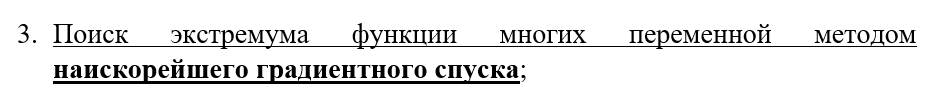

In [132]:
variable = input('Введите названия переменных: ').split()
starting_point = [int(x) for x in input('Введите значение начальной точки через пробел, целые числа: ').split()]
func = input('Введите минимизируемую функцию: ')
func_g = input('Функция градиента в аналитическом виде: ')
par = int(input('Указать необязательные параметры? 1-да/0-нет: '))

if par:
    accuracy = float(input('Точность оптимизации по аргументу для критерия Останова: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    accuracy = 0.00001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0


args = sympy.symbols(variable)
func = sympy.sympify(func)
func_g = sympy.sympify(func_g)

Введите названия переменных: x y z
Введите значение начальной точки через пробел, целые числа: 15 14 12
Введите минимизируемую функцию: x**2 + y**2 + z**2
Функция градиента в аналитическом виде: 2*x + 2*y + 2*z
Указать необязательные параметры? 1-да/0-нет: 0


In [137]:
def gradient_descent(max_iterations,threshold,w_init,func,func_g,extra_param = [], momentum=0.8):
    
    w = np.array(w_init)
    w_history = w
    f_history = obj_func(func,w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    m = 100
    while  i<max_iterations and diff>threshold:
        i+=1
        learning_rate = 1/min(i,m)
        delta_w = -learning_rate*np.sign(grad_func(func_g,w)) + momentum*delta_w
        w = w+delta_w
        
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(func,w)))
        res_p = w
        res_f = obj_func(func,w)

        diff = np.absolute(f_history[-1]-f_history[-2])
    if inter_res:
        return res_p, res_f, w_history, f_history
        
    return res_p, res_f

In [138]:
print(f'Значения переменных: {gradient_descent(iteration, accuracy, starting_point, func, func_g)[0]}')
print(f'Значения функции: {gradient_descent(iteration, accuracy, starting_point, func, func_g)[1]}')
if inter_res:
    print(f'История: {gradient_descent(iteration, accuracy, starting_point, func, func_g)[4]}')


Значения переменных: [ 1.33795494  0.33795494 -1.66204506]
Значения функции: 4.66673074427569


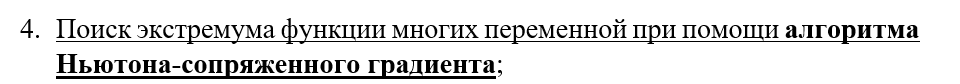

In [3]:
variable = input('Введите названия переменных: ').split()
starting_point = [int(x) for x in input('Введите значение начальной точки через пробел, целые числа: ').split()]
func = input('Введите минимизируемую функцию: ')
func_g = input('Функция градиента в аналитическом виде: ')
par = int(input('Указать необязательные параметры? 1-да/0-нет: '))

if par:
    accuracy = float(input('Точность оптимизации по аргументу для критерия Останова: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    accuracy = 0.00001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0


args = sympy.symbols(variable)
func = sympy.sympify(func)
func_g = sympy.sympify(func_g)

Введите названия переменных: x y z
Введите значение начальной точки через пробел, целые числа: 15 14 12
Введите минимизируемую функцию: x**2 + y**2 + z**2
Функция градиента в аналитическом виде: 2*x + 2*y + 2*z
Указать необязательные параметры? 1-да/0-нет: 0


In [4]:
def gradient_descent(max_iterations,threshold,w_init,func,func_g,extra_param = [], learning_rate=0.05, momentum=0.8):
    
    w = np.array(w_init)
    w_history = w
    f_history = obj_func(func,w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    m = 100
    while  i<max_iterations and diff>threshold:
        i+=1
        delta_w = -learning_rate*np.sign(grad_func(func_g,w)) + momentum*delta_w
        w = w+delta_w
        
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(func,w)))
        res_p = w
        res_f = obj_func(func,w)

        diff = np.absolute(f_history[-1]-f_history[-2])
    if inter_res:
        return res_p, res_f, w_history, f_history
        
    return res_p, res_f

In [6]:
print(f'Значения переменных: {gradient_descent(iteration, accuracy, starting_point, func, func_g)[0]}')
print(f'Значения функции: {gradient_descent(iteration, accuracy, starting_point, func, func_g)[1]}')
if inter_res:
    print(f'История: {gradient_descent(iteration, accuracy, starting_point, func, func_g)[4]}')


Значения переменных: [ 1.31137489  0.31137489 -1.68862511]
Значения функции: 4.66811318692813
